# Data Processing Module

## 0. Downloading Dataset

In this project, we use `Vietnamese car price` dataset, which contains information of 30.7k used car on a Vietnamese online market at the beginning of 2023

In [1]:
# Download Dataset using gdown
# https://drive.google.com/file/d/1uhhpMRqBVTTG5AYdddhYjvj26lVYnExL/view?usp=sharing
!pip install gdown==4.6.0 -q
!gdown 1uhhpMRqBVTTG5AYdddhYjvj26lVYnExL

Downloading...
From: https://drive.google.com/uc?id=1uhhpMRqBVTTG5AYdddhYjvj26lVYnExL
To: /content/vietnamese_car_price.zip
100% 12.2M/12.2M [00:00<00:00, 48.6MB/s]


In [2]:
# Unzip dataset
!unzip -qq -a vietnamese_car_price.zip

## 1. Import Libraries

In [3]:
# Import necessary libraries
import numpy as np # Import NumPy for numerical computations and data manipulation

import pandas as pd  # Import Pandas for data manipulation and analysis
pd.set_option('display.max_rows', 1000) # Set Pandas options to display a maximum of 1000 rows

import re # Import re for working with text and regular expressions

# Import warnings to ignore error
import warnings
warnings.filterwarnings("ignore")

# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set up matplotlib style
plt.style.available # Show list of available styles
plt.style.use('seaborn-v0_8-bright')

# Import LabelEncoder from sklearn.preprocessing for encoding categorical features
from sklearn.preprocessing import LabelEncoder

# Import StandardScaler from sklearn.preprocessing for normalization data
from sklearn.preprocessing import StandardScaler

## 2. Loading Dataset

In [4]:
# Loading dataset
car_details = pd.read_csv('car_detail_en.csv')
# Rename columns
car_details.rename(columns={'price. price': 'price',
                            'car_model': 'car_type'},
                   inplace=True)

# Check for dupication
item0 = car_details.shape[0]  # Stores the initial number of rows in the DataFrame
car_details = car_details.drop_duplicates()  # Removes duplicate rows from the DataFrame
item1 = car_details.shape[0]  # Stores the number of rows after removing duplicates
print(f"There are {item0-item1} duplicates found in the dataset")  # Prints the number of duplicates that were removed

There are 0 duplicates found in the dataset


In [5]:
car_details.head().T

,0,1,2,3,4
ad_id,17042,53794,73954,74150,87573
origin,Domestic assembly,Imported,Domestic assembly,Imported,Domestic assembly
condition,New car,New car,New car,New car,New car
car_type,Truck,SUV,Crossover,SUV,Crossover
mileage,0 Km,0 Km,0 Km,0 Km,0 Km
exterior_color,White,Black,Silver,White,Silver
interior_color,gray,Black,Brown,Black,gray
num_of_doors,2-door,5-door,5-door,5-door,5-door
seating_capacity,2-seat,7-seat,8-seat,5-seat,8-seat
engine,Petrol\t1.0 L,Petrol\t3.4 L,Petrol\t2.0 L,Petrol\t1.8 L,Petrol\t2.0 L


## 3. Data Preprocessing

### Convert `price` and `mileage` to numerical

In [6]:
# Before processing
car_details[["price", "mileage"]].head()

,price,mileage
0,249 Million,0 Km
1,4 Billion 286 Million,0 Km
2,885 Million,0 Km
3,754 Million,0 Km
4,850 Million,0 Km


In [7]:
# Function to convert price to numerical
def price_to_numeric(price):
    try:
        if "Billion" in price and not "Million" in price:
            return float(price.replace("Billion", "").replace(" ", ""))*1000
        elif "Million" in price and not "Billion" in price:
            return float(price.replace("Million", "").replace(" ", ""))
        else:
            return float(price.replace("Billion", "").replace("Million", "").replace(" ", ""))
    except:
        return None
# Apply function to convert price to numerical
car_details['price'] = car_details['price'].apply(price_to_numeric)
# Drop missing data
car_details = car_details[~car_details['price'].isnull()]


# Function to convert mileage to numerical
def mileage_to_numeric(mileage):
    try:
        return float(mileage.rstrip(' Km').replace(" ", '').replace(',',''))
    except:
        return None
# Apply function to convert mileage to numerical
car_details['mileage'] = car_details['mileage'].apply(mileage_to_numeric)

# Standardization
car_details['log10_price'] = np.log10(car_details['price'])
car_details['log10_mileage'] = np.log10(car_details['mileage']+1) # +1 to avoid Zero Devision Error

In [8]:
# After Processing result
car_details[["price", 'mileage', 'log10_price', 'log10_mileage']].head()

,price,mileage,log10_price,log10_mileage
0,249.0,0.0,2.396199,0.0
1,4286.0,0.0,3.632052,0.0
2,885.0,0.0,2.946943,0.0
3,754.0,0.0,2.877371,0.0
4,850.0,0.0,2.929419,0.0


### Get `engine` specifications

In [9]:
# Before Processing
car_details[["engine", "fuel_consumption"]].head()

,engine,fuel_consumption
0,Petrol\t1.0 L,L/100Km
1,Petrol\t3.4 L,10\tL/100Km
2,Petrol\t2.0 L,L/100Km
3,Petrol\t1.8 L,L/100Km
4,Petrol\t2.0 L,L/100Km


In [10]:
# Get fuel-type
car_details['fuel_type'] = car_details['engine'].apply(lambda engine: str(engine).split('\t')[0])

# Define a function to get engine size
def get_engine_type(engine):
    result = str(engine).split('\t')[-1]
    if "L" in result:
        result = float(result.replace("L", "").replace(" ", ""))
        return result
    else:
        return None
# Get engine size
car_details['engine_size'] = car_details['engine'].apply(get_engine_type)

# Define a function to get fuel consumptions
def get_fuel_consumption(fuel_consumption):
    result = str(fuel_consumption).replace("L/100Km", "").rstrip("\t").replace(',','').strip() # Remove non-numeric charater
    pattern = r'[A-Za-z]'
    result = re.sub(pattern,'', result)  # Remove non-numeric charaters
    if result:
        return float(result)
    else:
        return None
# Get fuel consumptions
car_details['fuel_consumption'] = car_details['fuel_consumption'].apply(get_fuel_consumption)

In [11]:
# After Processing
car_details[["engine", "fuel_type", "engine_size", "fuel_consumption"]].head()

,engine,fuel_type,engine_size,fuel_consumption
0,Petrol\t1.0 L,Petrol,1.0,NaN
1,Petrol\t3.4 L,Petrol,3.4,10.0
2,Petrol\t2.0 L,Petrol,2.0,NaN
3,Petrol\t1.8 L,Petrol,1.8,NaN
4,Petrol\t2.0 L,Petrol,2.0,NaN


### Get `car_model`

In [12]:
# Before Processing
car_details[["brand", "grade", "car_name"]].head()

,brand,grade,car_name
0,Suzuki,Super Carry Truck,Suzuki Super Carry Truck 1.0 MT 2022
1,Toyota,Land Cruiser,Toyota Land Cruiser 3.5 V6 2022
2,Toyota,Innova,Toyota Innova G 2.0 AT 2023 car
3,Toyota,Corolla Cross,Toyota Corolla Cross 1.8G 2023
4,Toyota,Innova,Toyota Innova G 2.0 AT 2022 car


In [13]:
# Combine brand and grade
car_details['brand_grade'] = car_details['brand'] + ' ' + car_details['grade']

# Define a function to get car model
def get_car_model(data_row):
    substring = data_row['brand_grade'] + ' '
    if substring in data_row['car_model']:
        data_row['car_model'] = data_row['car_model'].replace(substring, '')
        return data_row
    else:
        return data_row

# Get car model
car_details['car_model'] = car_details['car_name']
car_details = car_details.apply(get_car_model, axis=1)

In [14]:
# Before Processing
car_details[["brand", "grade", "car_name", "brand_grade", "car_model"]].sample(5)

,brand,grade,car_name,brand_grade,car_model
30065,Mercedes Benz,CLS class,Mercedes Benz CLS class 350 2013,Mercedes Benz CLS class,350 2013
17973,Honda,City,Honda City 1.5 2018 car,Honda City,1.5 2018 car
19819,Lexus,RX,Lexus RX 300 2021,Lexus RX,300 2021
16670,BMW,5 Series,BMW 5 Series 520i Luxury Line 2022,BMW 5 Series,520i Luxury Line 2022
7496,Daewoo,Gentra,Daewoo Gentra SX 1.5 MT 2011,Daewoo Gentra,SX 1.5 MT 2011


### Get car specifications

In [15]:
# Before Processing
car_details[["num_of_doors", 'seating_capacity']].head()

,num_of_doors,seating_capacity
0,2-door,2-seat
1,5-door,7-seat
2,5-door,8-seat
3,5-door,5-seat
4,5-door,8-seat


In [16]:
# Define a function to get number of doors
def get_num_of_doors(num_of_doors):
    result = int(str(num_of_doors).split('-')[0])
    return result
# Get number of doors
car_details['num_of_doors'] = car_details['num_of_doors'].apply(get_num_of_doors)

# Define a function to get seating_capacity
def get_seating_capacity(seating_capacity):
    result = int(str(seating_capacity).split('-')[0])
    return result
# Get seating_capacity
car_details['seating_capacity'] = car_details['seating_capacity'].apply(get_seating_capacity) # Get seating_capacity

In [17]:
# After Processing result
car_details[["num_of_doors", 'seating_capacity']].head()

,num_of_doors,seating_capacity
0,2,2
1,5,7
2,5,8
3,5,5
4,5,8


### Get `seller_address`

In [18]:
# Load sellers dataset
sellers = pd.read_csv("seller.csv")

# Rename Columns
sellers.rename(columns = {"Mã tin": 'ad_id',
                          "Địa chỉ": "seller_address"}, inplace=True)

# Select only specific columns of interest
sellers = sellers[['ad_id', 'seller_address']]

# Get city name from address
def get_city_name(address):
  # Remove duplicate space in string
  pattern = ' +' # More than 1 space continuously
  address = re.sub(pattern, ' ', address)
  # Check if 2-3 last word are city name
  if ' '.join(address.strip(' ').split(' ')[-2:]) == 'Thiên Huế':
    return ' '.join(address.strip(' ').split(' ')[-3:])
  else:
    return ' '.join(address.strip(' ').split(' ')[-2:])

sellers['seller_address'] = sellers['seller_address'].apply(get_city_name)

# Merge car_details with sellers
car_details = pd.merge(car_details, sellers, on="ad_id", how="left")
car_details.drop(columns=['ad_id'], inplace=True)

In [19]:
# After Processing
car_details["seller_address"].head()

0    Hà Nội
1    Hà Nội
2    TP HCM
3    TP HCM
4    Hà Nội
Name: seller_address, dtype: object

## Descriptive Statistic Analysis

### Overview

In [20]:
car_details.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,30480.0,408916.129298,3.498746e+07,0.000000,0.000000,20000.000000,60000.000000,4.294967e+09
num_of_doors,30480.0,4.503675,9.528328e-01,0.000000,4.000000,5.000000,5.000000,5.400000e+01
seating_capacity,30480.0,5.541568,1.582796e+00,0.000000,5.000000,5.000000,7.000000,4.700000e+01
fuel_consumption,11365.0,35.751298,2.100679e+03,0.000000,6.000000,7.000000,8.000000,2.000000e+05
year_of_manufacture,30451.0,2017.356901,5.287769e+00,1990.000000,2015.000000,2019.000000,2022.000000,2.023000e+03
price,30480.0,1122.879462,2.059597e+03,12.000000,383.000000,589.000000,920.000000,5.400000e+04
log10_price,30480.0,2.804430,4.137314e-01,1.079181,2.583199,2.770115,2.963788,4.732394e+00
log10_mileage,30480.0,2.999295,2.219842e+00,0.000000,0.000000,4.301052,4.778158,9.632960e+00
engine_size,29129.0,2.047245,8.162916e-01,0.100000,1.500000,2.000000,2.400000,1.270000e+01


### Check For Abnormal Data

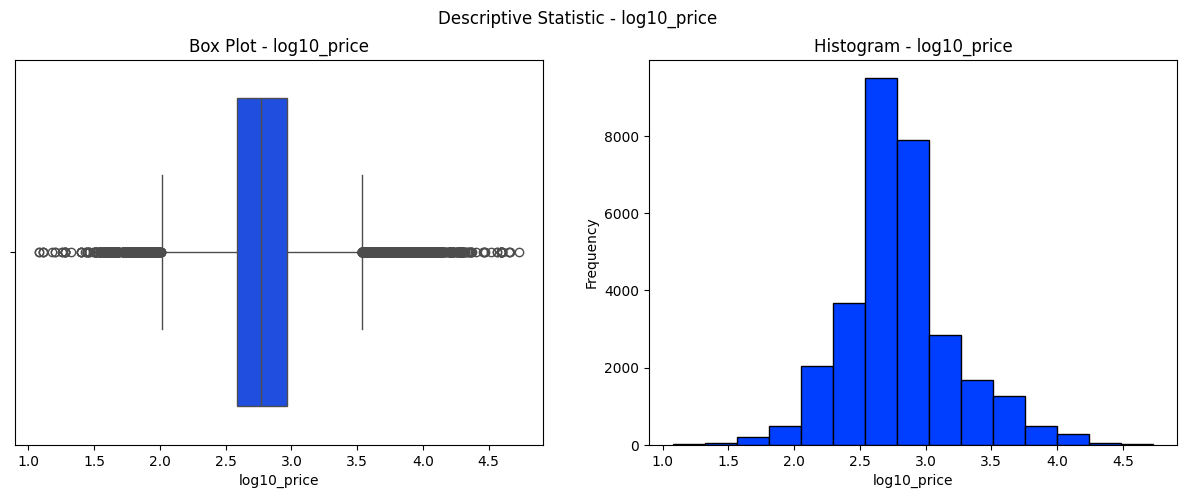

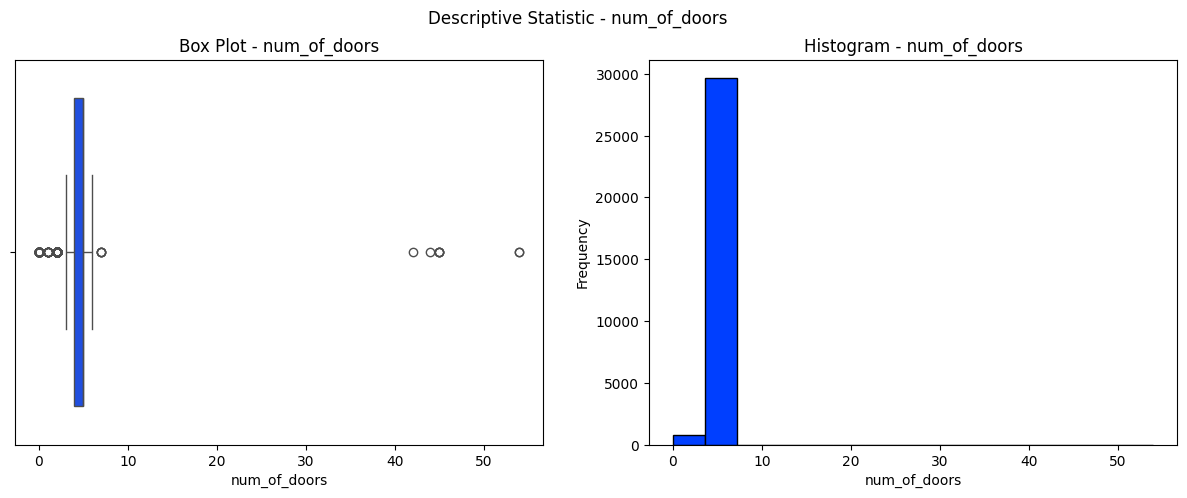

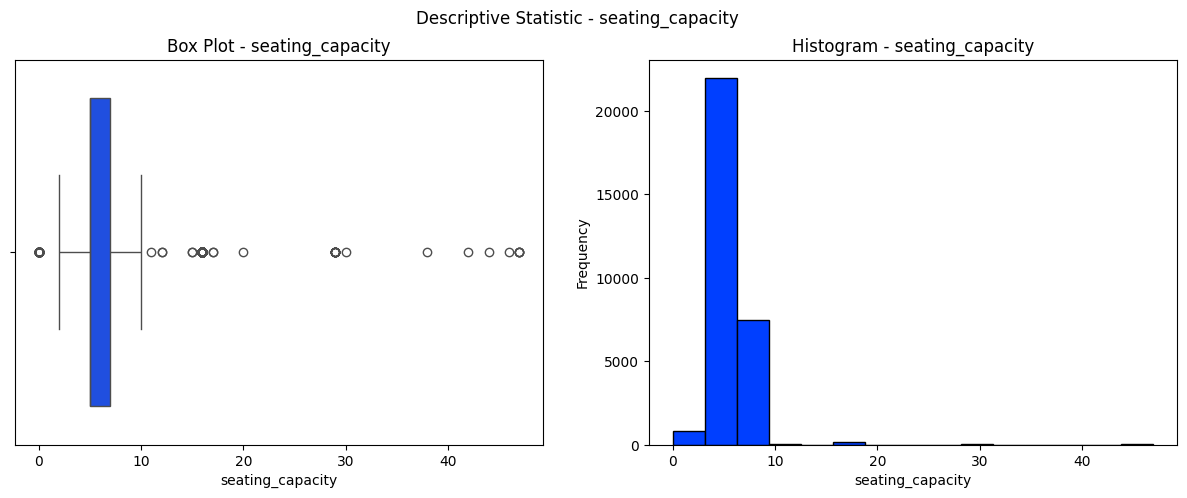

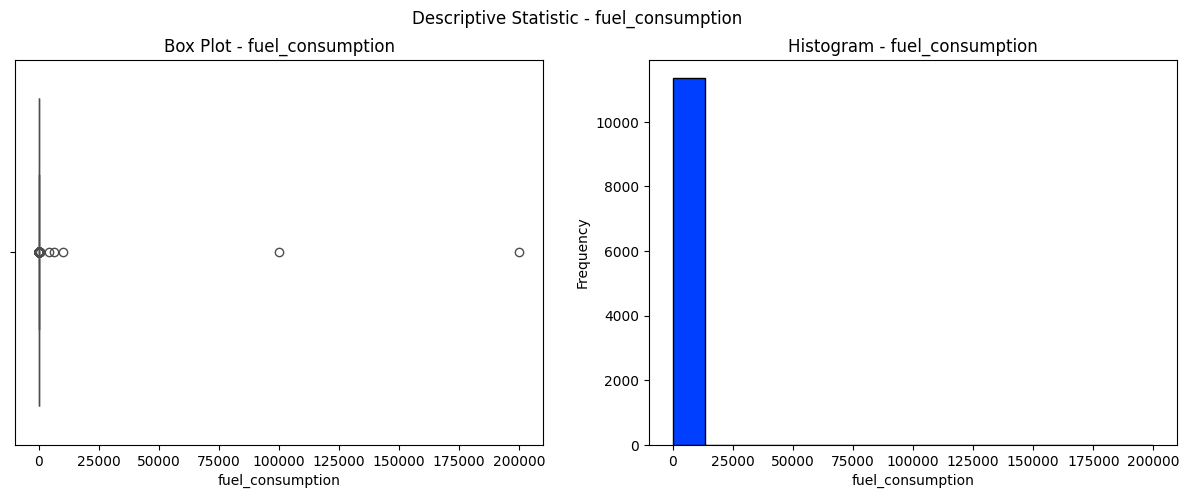

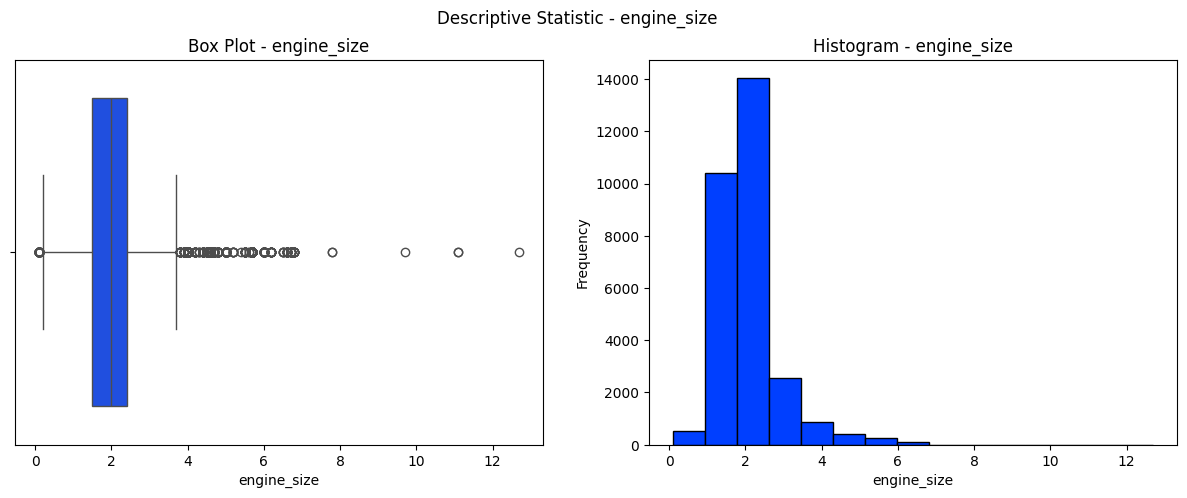

In [21]:
# Visualize distribution of numeric data
for col in ['log10_price', 'num_of_doors',
            'seating_capacity', 'fuel_consumption', 'engine_size']:
    # Initialize figure
    plt.figure(figsize=(15,5))
    plt.suptitle(f'Descriptive Statistic - {col}')
    # Subplot 1 - Box plot
    plt.subplot(121)
    sns.boxplot(x=col, data=car_details)
    plt.title(f'Box Plot - {col}')
    # Subplot 2 - Histogram
    plt.subplot(122)
    car_details[col].plot(kind='hist', bins=15, edgecolor='black')
    plt.xlabel(col)
    plt.title(f'Histogram - {col}')
    # Show plots
    plt.show()

#### Number of doors and seating capacity

In [22]:
##########################
#  Remove abnormal data  #
##########################

# num_of_doors
item0 = car_details.shape[0] # Stores the initial number of rows in the DataFrame
car_details = car_details[car_details['num_of_doors']<=7.0] # Number of doors must lower than 7
car_details = car_details[car_details['num_of_doors']> 0] # Number of doors must greater than 0
item1 = car_details.shape[0] # Stores the number of rows after removing abnormal data
print(f"There are {item0-item1} abnormal data of num_of_doors found in the dataset")

# seating_capacity
item0 = car_details.shape[0]  # Stores the initial number of rows in the DataFrame
car_details = car_details[car_details['seating_capacity']>0].reset_index() # Seating capacity must greater than 0
item1 = car_details.shape[0]  # Stores the number of rows after removing abnormal data
print(f"There are {item0-item1} abnormal data of seating_capacity found in the dataset")

There are 77 abnormal data of num_of_doors found in the dataset
There are 7 abnormal data of seating_capacity found in the dataset


#### Fuel Consumption

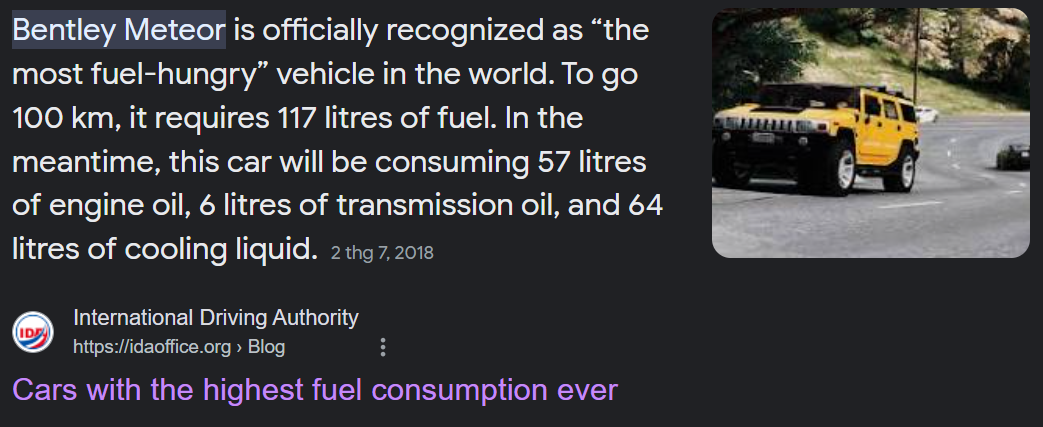

In [23]:
# fuel_consumption
item0 = car_details.shape[0]  # Stores the initial number of rows in the DataFrame
car_details['fuel_consumption'].fillna(0, inplace=True)  # Fills the missing values in the 'fuel_consumption' column with 0
car_details = car_details[car_details['fuel_consumption']<100].reset_index()
car_details['fuel_consumption'].apply(lambda x: None if x == 0 else x)
item1 = car_details.shape[0]  # Stores the number of rows after removing abnormal data
print(f"There are {item0-item1} abnormal data of fuel_consumption found in the dataset")

There are 18 abnormal data of fuel_consumption found in the dataset


#### Mile Age

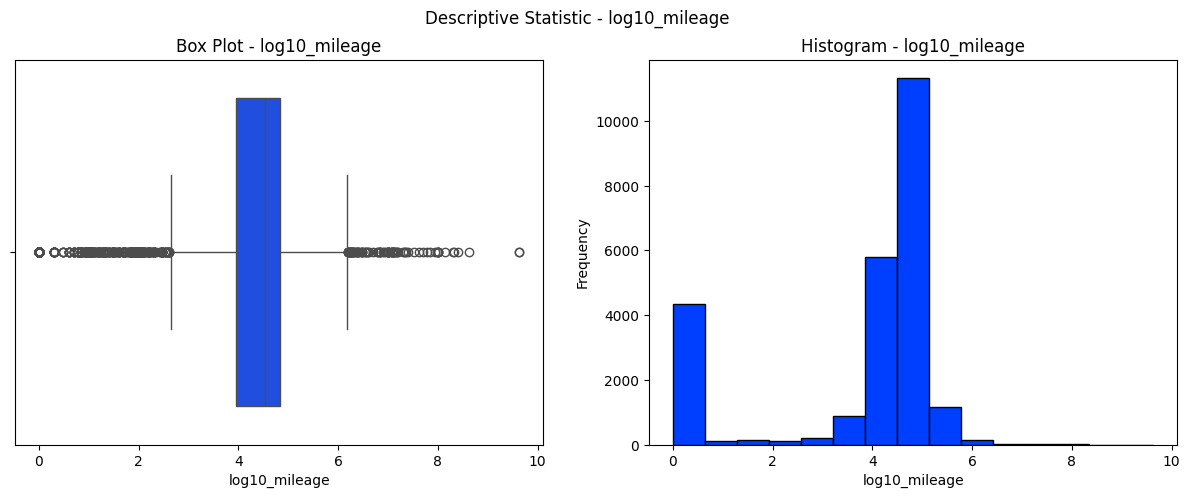

In [24]:
# Descriptive Statistic Analysis - log10_mileage
# Initialize figure
plt.figure(figsize=(15,5))
plt.suptitle('Descriptive Statistic - log10_mileage')
# Subplot 1
plt.subplot(121)
sns.boxplot(x='log10_mileage',
            data=car_details[car_details['condition']=='Used car']) # Extract only data of used car
plt.title('Box Plot - log10_mileage')
# Subplot 2
plt.subplot(122)
car_details[car_details['condition']=='Used car']['log10_mileage'] \
            .plot(kind='hist', bins=15, edgecolor='black')
plt.xlabel('log10_mileage')
plt.title('Histogram - log10_mileage')
plt.show()

## Factor Analysis

In [25]:
# Select only specific columns of interest
selected_cols = ['log10_price', 'brand_grade', 'car_name', 'car_model', 'car_type',
                 'origin', 'condition', 'log10_mileage', 'exterior_color', 'interior_color',
                 'num_of_doors', 'seating_capacity','fuel_type', 'engine_size', 'transmission',
                 'drive_type', 'fuel_consumption', 'year_of_manufacture', 'seller_address']
stat_car_details = car_details[selected_cols]

In [26]:
# Identify categorical columns in the DataFrame 'car_details'
# These columns contain non-numeric data
categorical_cols = stat_car_details.select_dtypes(include=['object']).columns

# Identify numeric columns in the DataFrame 'car_details'
numeric_cols = stat_car_details.select_dtypes(include=['int64', 'float64']).columns

# Print the identified categorical and numeric columns
print("Categorical Columns:")
print(categorical_cols)
print("\nNumeric Columns:")
print(numeric_cols)

Categorical Columns:
Index(['brand_grade', 'car_name', 'car_model', 'car_type', 'origin',
       'condition', 'exterior_color', 'interior_color', 'fuel_type',
       'transmission', 'drive_type', 'seller_address'],
      dtype='object')

Numeric Columns:
Index(['log10_price', 'log10_mileage', 'num_of_doors', 'seating_capacity',
       'engine_size', 'fuel_consumption', 'year_of_manufacture'],
      dtype='object')


In [27]:
# Initialize LabelEncoder and StandardScaler instances
encoder = LabelEncoder()
scaler = StandardScaler()

In [28]:
# Encode categorical features
for col in categorical_cols:
    stat_car_details[col] = encoder.fit_transform(stat_car_details[col])

# Standarization
for col in stat_car_details.columns:
    stat_car_details[col] = scaler.fit_transform(stat_car_details[[col]])

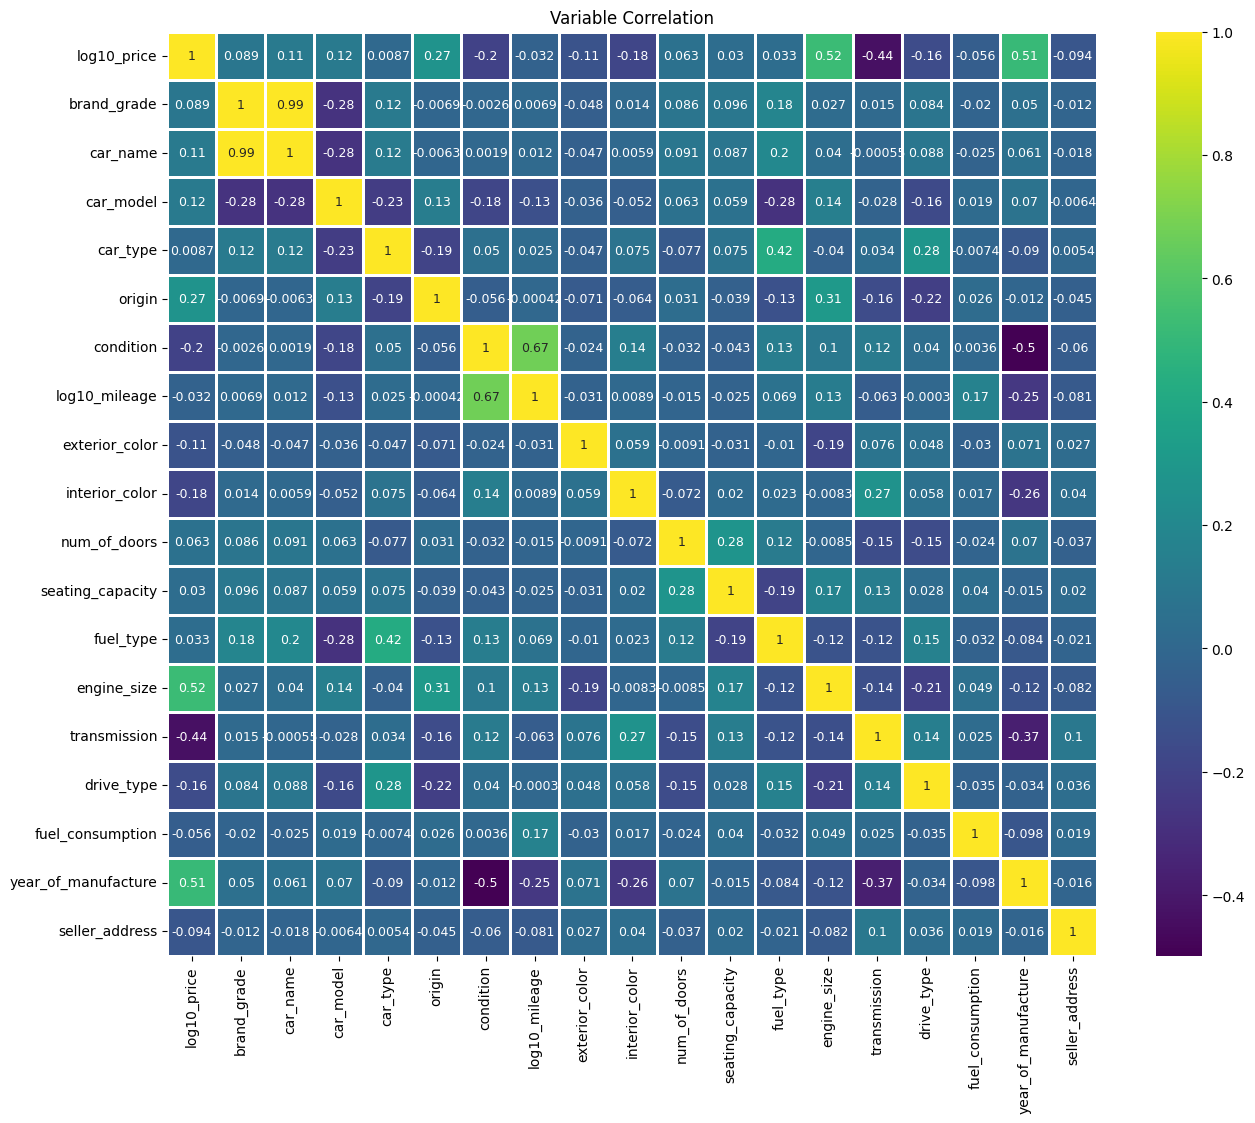

In [29]:
correlation_matrix = stat_car_details.corr()

plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, cmap = 'viridis',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation');

## Export Result to CSV file

In [ ]:
# Select only specific columns of interest
selected_cols = ['price', 'log10_price', 'brand_grade', 'car_name', 'car_model',
                 'origin', 'condition', 'mileage', 'log10_mileage','exterior_color',
                 'interior_color', 'num_of_doors', 'seating_capacity','fuel_type',
                 'engine_size', 'transmission','drive_type', 'fuel_consumption',
                 'year_of_manufacture', 'seller_address']
car_details = car_details[selected_cols]

# Export Report to csv
car_details.to_csv("car_details_preprocessed.csv",index=False)